In [1]:
import os
import pygame
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.display.init()

import seaborn as sns
sns.set_style("white")
import sys
sys.path.append("../..")
from carl.envs import CARLAcrobotEnv, CARLAcrobotEnv_defaults

from tqdm import tqdm
from typing import Dict


def get_renders(env_specs: Dict, n_renders: int):
    renders = {}
    states = {}
    for env_cls, contexts in env_specs.items():
        print(env_cls.__name__)
        env = env_cls(contexts=contexts)
        _renders = []
        _states = []
        for i in tqdm(range(n_renders)):
            s = env.reset()
            _states.append(s)
            _renders.append(env.render(mode="rgb_array"))
        renders[env_cls.__name__] = _renders
        states[env_cls.__name__] = np.array(_states)
    return renders, states

# Vary context features describing the physical shape of Acrobot
context_features = ["link_length_1", "link_length_2"]
short_names = ["ll1", "ll2"]
delta_lower = 0.7
delta_upper = 0.5
defaults = [CARLAcrobotEnv_defaults[cf] for cf in context_features]
# These context features should be scaled

n_contexts = 4
contexts = {i: {cf: np.random.uniform(defaults[j] - delta_lower, defaults[j] + delta_upper) for j, cf in enumerate(context_features)} for i in range(n_contexts)}


env_specs = {
    CARLAcrobotEnv: contexts,
}
renders, states = get_renders(env_specs=env_specs, n_renders=n_contexts)



pygame 2.1.0 (SDL 2.0.16, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


2022-08-23 14:57:49.089818: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-23 14:57:49.111610: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-23 14:57:49.112912: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
/home/benjamin/.conda/envs/py39/lib/python3.9/site-packages/trimesh/curvature.py:12: DeprecationWarning: Please use `coo_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.coo` namespace is deprecated.
  from scipy.sparse.coo im

CARLAcrobotEnv


100%|██████████| 4/4 [00:00<00:00,  8.75it/s]


(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)


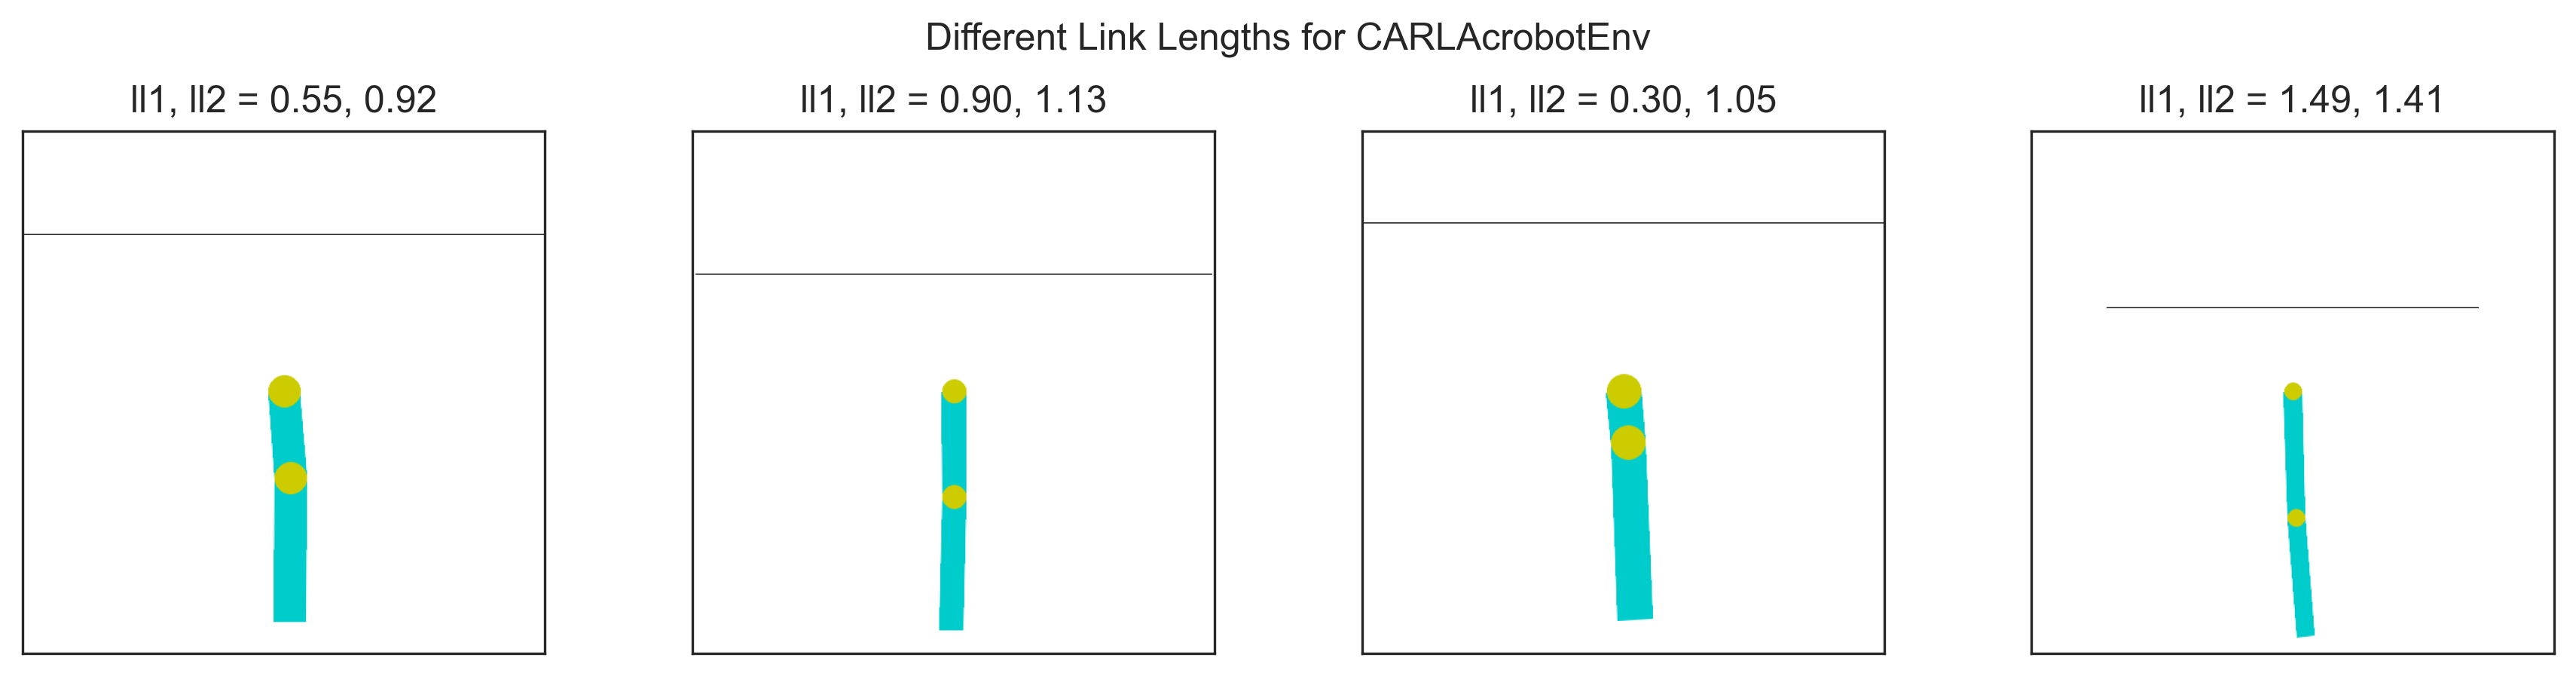

In [2]:

title = f"Different Link Lengths for {CARLAcrobotEnv.__name__}"

nrows = 1
ncols = n_contexts
enlarge = 3
fig = plt.figure(figsize=(ncols * enlarge, nrows * enlarge), dpi=300)
axes = fig.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
for i, render in enumerate(list(renders.values())[0]):
    print(render.shape)
    ax = axes[i]
    ax.imshow(render / 255)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    cf_values = list(contexts[i].values())
    ax.set_title(", ".join(short_names) + " = " + ", ".join([f"{v:.2f}" for v in cf_values]))
if title:
    fig.suptitle(title)

fig.set_tight_layout(True)
plt.show()




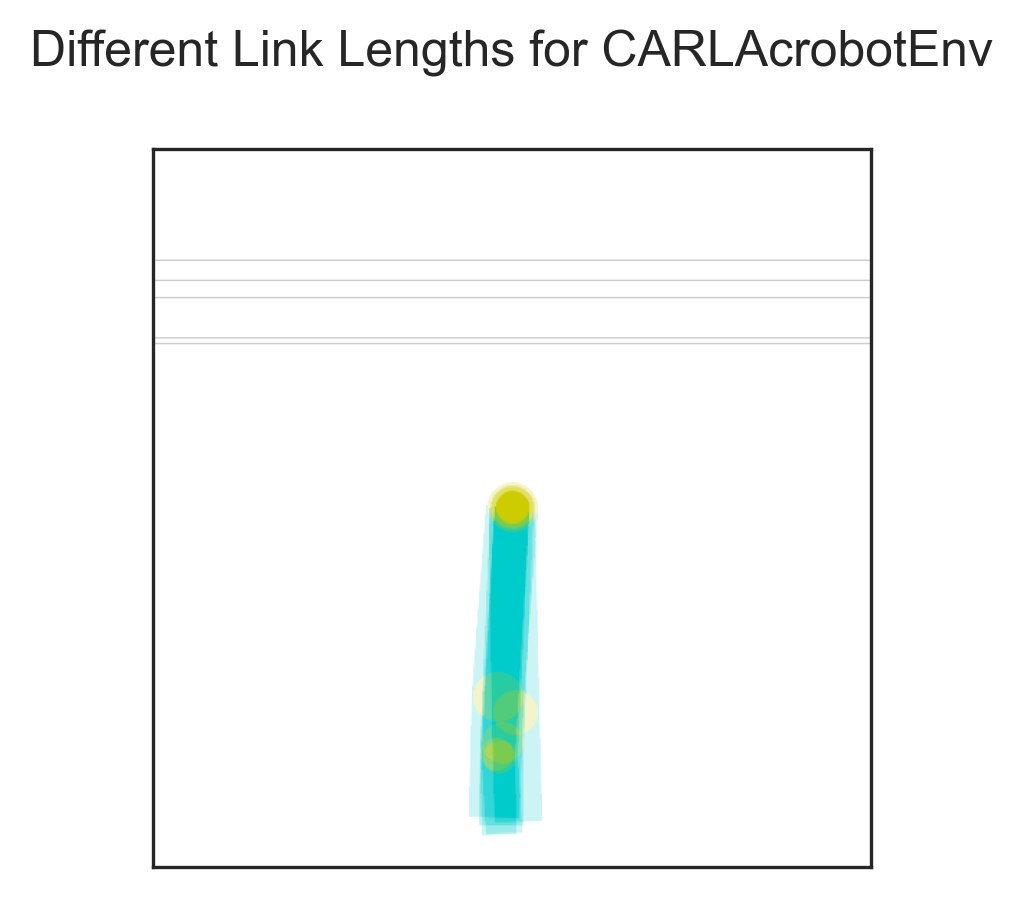

In [29]:
title = f"Different Link Lengths for {CARLAcrobotEnv.__name__}"

figsize = (3, 3)
fig = plt.figure(figsize=figsize, dpi=300)
ax = fig.add_subplot(111)
_renders = renders[CARLAcrobotEnv.__name__]
_renders = np.array(_renders)
render = np.mean(_renders, axis=0) / 255
ax.imshow(render)
ax.set_xticks([])
ax.set_yticks([])
fig.suptitle(title)
fig.set_tight_layout(True)
plt.show()
